Jorge Zamora Villarreal

IMTC 2077438 IMTC N1 LMV

A4: Entrenamiento de Red Neuronal Artificial simple.

In [ ]:
#Importamos las librerias necesarias
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
#Importamos el set de datos
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Cada imagen es mapeada a una unica etiqueta
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
#Explore el set de datos
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

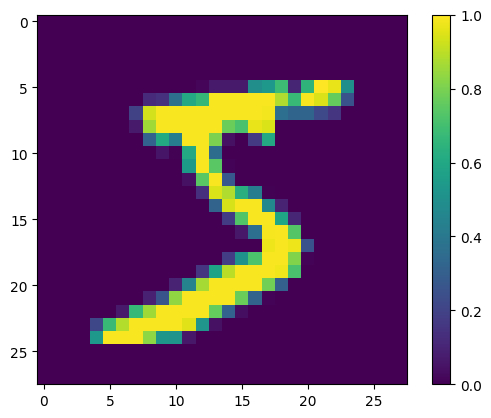

In [ ]:
#Pre-procesamos el set de datos
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Escalamos estos valores en un rango de 0 a 1
train_images = train_images / 255.0

test_images = test_images / 255.0

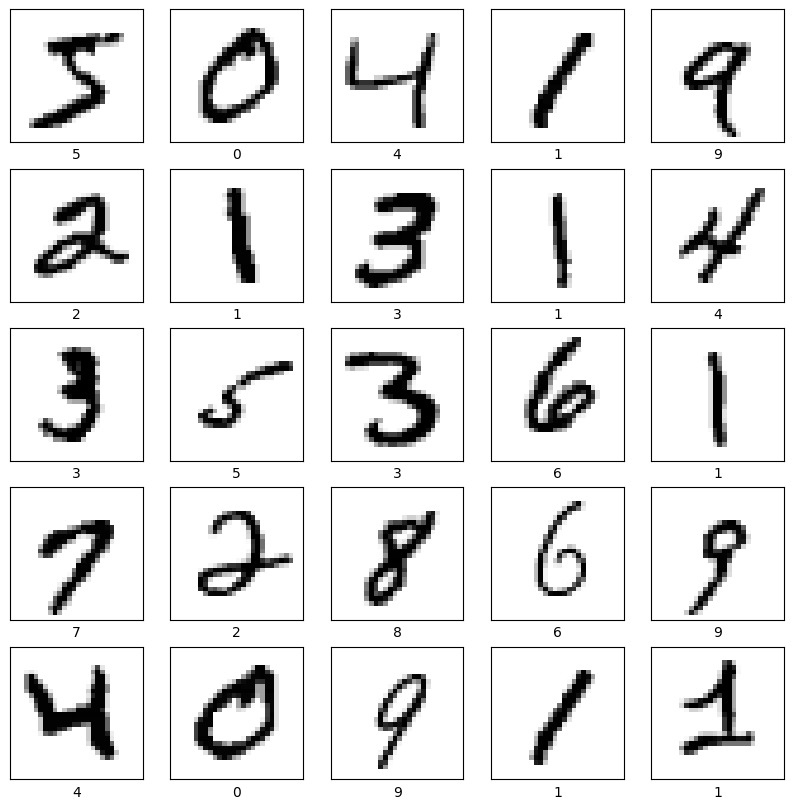

In [ ]:
#desplegamos las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Configuramos las capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#Aqui compilamos
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#llamamos el metodo model.fit
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1305 - accuracy: 0.7385
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4670 - accuracy: 0.8767
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3719 - accuracy: 0.8972
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3344 - accuracy: 0.9051
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3127 - accuracy: 0.9101
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2973 - accuracy: 0.9142
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2854 - accuracy: 0.9178
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2747 - accuracy: 0.9214
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2642 - accuracy: 0.9243
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.253

In [ ]:
#Evaluamos la exactitud
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2445 - accuracy: 0.9304 - 616ms/epoch - 2ms/step

Test accuracy: 0.930400013923645


In [ ]:
#Hacemos predicciones
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([8.7116699e-05, 1.2659940e-08, 2.2960120e-04, 1.5907794e-03,
       3.1067478e-07, 8.0621583e-05, 1.9702713e-09, 9.9714577e-01,
       1.2915406e-05, 8.5275178e-04], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
#Graficamos
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

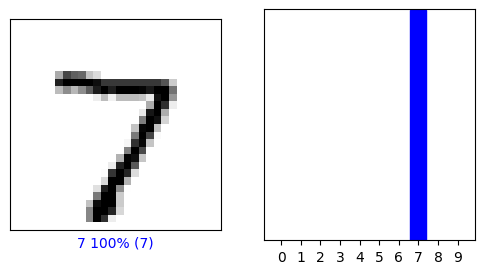

In [ ]:
#Miramos la imagen [0], sus predicciones y el arreglo de predicciones
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

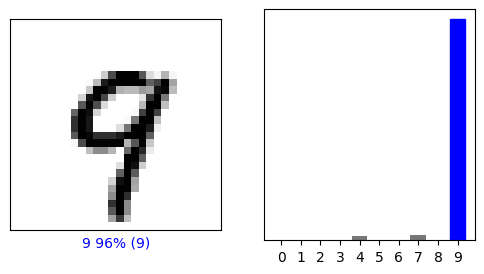

In [ ]:
#Aqui la imagen 12
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

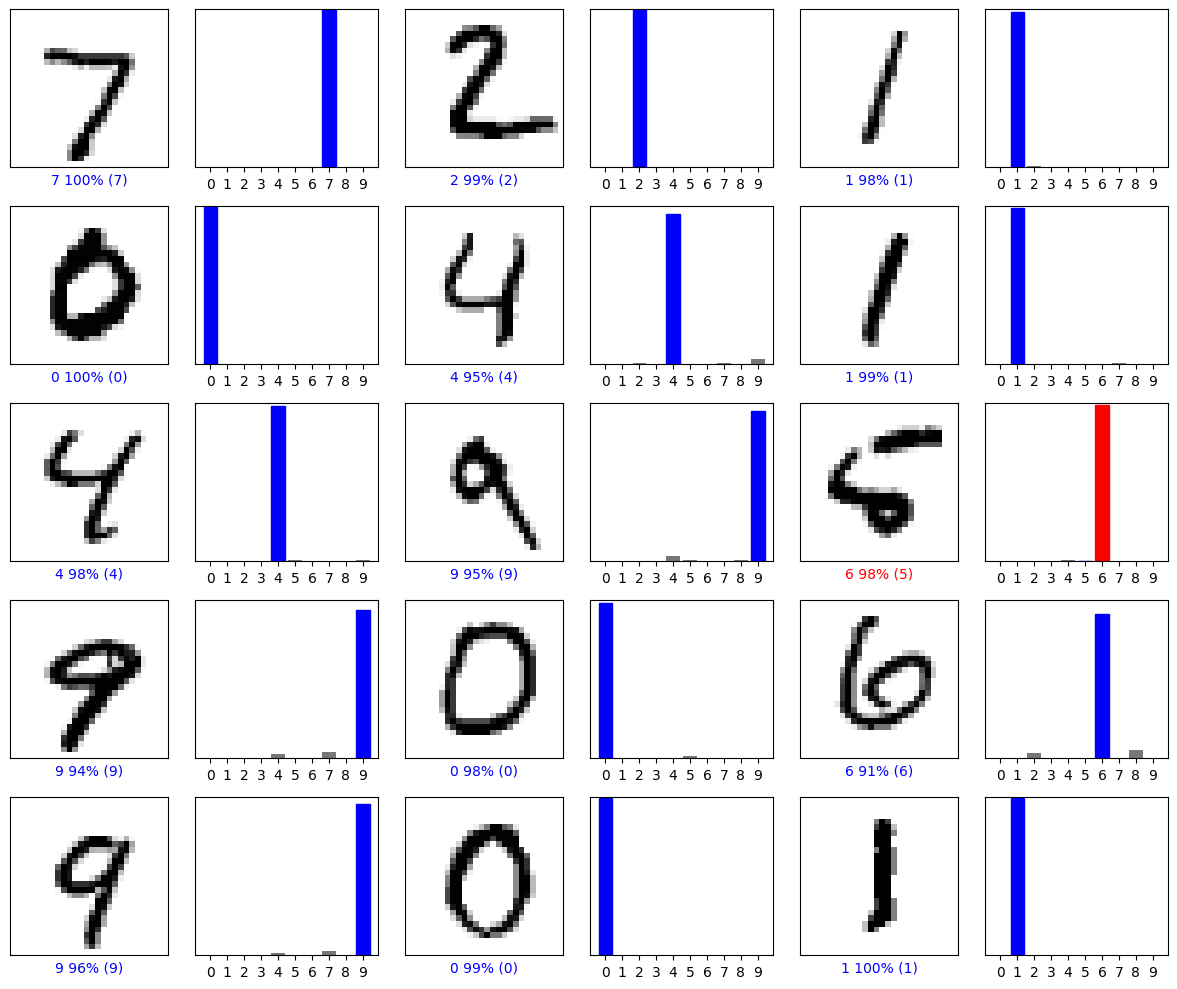

In [ ]:
#Graficamos multiples imagenes con sus predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[1.3521115e-03 2.9165651e-06 9.9356234e-01 1.8471297e-03 1.2162590e-11
  1.5497068e-03 1.5016978e-03 8.7146375e-12 1.8406512e-04 5.2564616e-11]]


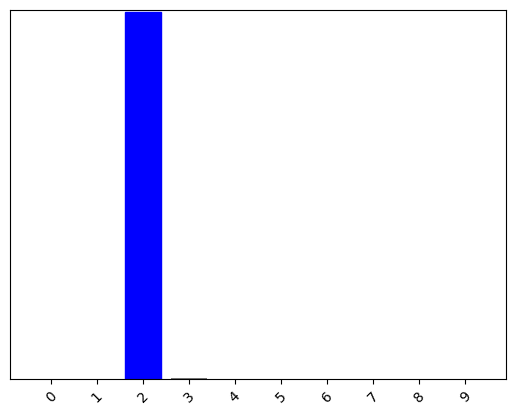

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2